# Intro to Recommender Systems Lab

Complete the exercises below to solidify your knowledge and understanding of recommender systems.

For this lab, we are going to be putting together a user similarity based recommender system in a step-by-step fashion. Our data set contains customer grocery purchases, and we will use similar purchase behavior to inform our recommender system. Our recommender system will generate 5 recommendations for each customer based on the purchases they have made.

In [260]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (22,12)
plt.rcParams['font.size'] = 14

In [2]:
data = pd.read_csv('../data/customer_product_sales.csv')

In [3]:
data.head()

,CustomerID,FirstName,LastName,SalesID,ProductID,ProductName,Quantity
0,61288,Rosa,Andersen,134196,229,Bread - Hot Dog Buns,16
1,77352,Myron,Murray,6167892,229,Bread - Hot Dog Buns,20
2,40094,Susan,Stevenson,5970885,229,Bread - Hot Dog Buns,11
3,23548,Tricia,Vincent,6426954,229,Bread - Hot Dog Buns,6
4,78981,Scott,Burch,819094,229,Bread - Hot Dog Buns,20


## Step 1: Create a data frame that contains the total quantity of each product purchased by each customer.

You will need to group by CustomerID and ProductName and then sum the Quantity field.

In [61]:
pp_data = data.groupby(['CustomerID', 'ProductName'])['Quantity'].sum().reset_index()
pp_data.head()

,CustomerID,ProductName,Quantity
0,33,Apricots - Dried,1
1,33,Assorted Desserts,1
2,33,Bandage - Flexible Neon,1
3,33,"Bar Mix - Pina Colada, 355 Ml",1
4,33,"Beans - Kidney, Canned",1


## Step 2: Use the `pivot_table` method to create a product by customer matrix.

The rows of the matrix should represent the products, the columns should represent the customers, and the values should be the quantities of each product purchased by each customer. You will also need to replace nulls with zeros, which you can do using the `fillna` method.

In [62]:
pt_data = data.pivot_table(index='ProductName', columns='CustomerID', values='Quantity', fill_value=0)
pt_data.head()

CustomerID,33,200,264,356,412,464,477,639,649,669,...,97697,97753,97769,97793,97900,97928,98069,98159,98185,98200
ProductName,,,,,,,,,,,,,,,,,,,,,
Anchovy Paste - 56 G Tube,0,0,0,0,0,0,0,1,0,0,...,0,25,0,0,0,0,0,0,0,0
"Appetizer - Mini Egg Roll, Shrimp",0,0,0,0,0,0,0,0,0,0,...,25,25,0,0,0,0,0,0,0,0
Appetizer - Mushroom Tart,0,0,0,0,0,0,0,1,0,0,...,25,0,0,0,0,0,0,0,25,0
Appetizer - Sausage Rolls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,25,25,25,0,25,0
Apricots - Dried,1,0,0,0,1,0,0,0,0,0,...,0,25,0,0,0,0,0,0,0,0


## Step 3: Create a customer similarity matrix using `squareform` and `pdist`. For the distance metric, choose "euclidean."

In [230]:
csm = pd.DataFrame(1/(1+squareform(pdist(pt_data.T, 'euclidean'))), columns=pt_data.columns, index=pt_data.columns)
csm.head()

CustomerID,33,200,264,356,412,464,477,639,649,669,...,97697,97753,97769,97793,97900,97928,98069,98159,98185,98200
CustomerID,,,,,,,,,,,,,,,,,,,,,
33,1.000000,0.085297,0.093953,0.091747,0.087410,0.089695,0.085297,0.088913,0.088152,0.089695,...,0.004809,0.005108,0.004996,0.005421,0.004920,0.005023,0.004880,0.005026,0.004549,0.004883
200,0.085297,1.000000,0.085638,0.085297,0.080070,0.083020,0.084959,0.083651,0.085638,0.087047,...,0.004825,0.005121,0.005014,0.005448,0.004925,0.005032,0.004909,0.005042,0.004553,0.004879
264,0.093953,0.085638,1.000000,0.088152,0.089301,0.087047,0.085638,0.086333,0.087047,0.087047,...,0.004822,0.005115,0.004996,0.005441,0.004932,0.005055,0.004894,0.005042,0.004566,0.004883
356,0.091747,0.085297,0.088152,1.000000,0.085983,0.086688,0.085983,0.091325,0.085983,0.087410,...,0.004814,0.005111,0.004999,0.005437,0.004920,0.005036,0.004871,0.005042,0.004563,0.004886
412,0.087410,0.080070,0.089301,0.085983,1.000000,0.085638,0.085638,0.089301,0.084959,0.087779,...,0.004808,0.005131,0.004996,0.005441,0.004925,0.005042,0.004876,0.005039,0.004568,0.004903


## Step 4: Check your results by generating a list of the top 5 most similar customers for a specific CustomerID.

In [74]:
cID = data.CustomerID.sample(1).iloc[0] # Select a random CustomerID
top5 = csm[cID].sort_values(ascending=False)[1:6].index.tolist()
top5

[18622, 17765, 39757, 23515, 19148]

## Step 5: From the data frame you created in Step 1, select the records for the list of similar CustomerIDs you obtained in Step 4.

In [75]:
top5_df = pp_data[pp_data.CustomerID.isin(top5)]
top5_df.head()

,CustomerID,ProductName,Quantity
11886,17765,Bacardi Breezer - Tropical,5
11887,17765,Bar - Granola Trail Mix Fruit Nut,5
11888,17765,Bay Leaf,5
11889,17765,Beer - Labatt Blue,5
11890,17765,Beer - Rickards Red,5


## Step 6: Aggregate those customer purchase records by ProductName, sum the Quantity field, and then rank them in descending order by quantity.

This will give you the total number of each product purchased by the 5 most similar customers to the customer you selected in order from most purchased to least.

In [110]:
cID_p = top5_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
cID_p.head(10)

ProductName
Bacardi Breezer - Tropical         31
Pastry - Butterscotch Baked        27
Macaroons - Two Bite Choc          27
Grapes - Red                       26
Pork - Loin, Bone - In             23
Bread - Roll, Soft White Round     22
Sardines                           22
Wine - Magnotta - Cab Sauv         22
Soup - Campbells Tomato Ravioli    22
Beef - Ground Medium               22
Name: Quantity, dtype: int64

## Step 7: Filter the list for products that the chosen customer has not yet purchased and then recommend the top 5 products with the highest quantities that are left.

- Merge the ranked products data frame with the customer product matrix on the ProductName field.
- Filter for records where the chosen customer has not purchased the product.
- Show the top 5 results.

In [128]:
cID_pnb = [p for p in cID_p.index if not p in data['ProductName'][data.CustomerID == cID].unique()]
cID_p[cID_p.index.isin(cID_pnb)][:5]

ProductName
Macaroons - Two Bite Choc          27
Grapes - Red                       26
Pork - Loin, Bone - In             23
Wine - Magnotta - Cab Sauv         22
Soup - Campbells Tomato Ravioli    22
Name: Quantity, dtype: int64

## Step 8: Now that we have generated product recommendations for a single user, put the pieces together and iterate over a list of all CustomerIDs.

- Create an empty dictionary that will hold the recommendations for all customers.
- Create a list of unique CustomerIDs to iterate over.
- Iterate over the customer list performing steps 4 through 7 for each and appending the results of each iteration to the dictionary you created.

In [231]:
recomendations = {}

for ID in data.CustomerID.unique():
    # Getting Top 5 similar CustomerID
    top5 = csm[ID].sort_values(ascending=False)[1:6].index.tolist() 
    # Filter Product Quantity Dataframe by Top 5 similar CustimerID
    top5_df = pp_data[pp_data.CustomerID.isin(top5)] 
    # Sort Top 5 Products by simliar CustomerID
    cID_p = top5_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False) 
    # Get list of products recommended to Customer
    cID_pnb = [p for p in cID_p.index if not p in data['ProductName'][data.CustomerID == cID].unique()]
    # Append Customer ID with top 5 Products recommended
    recomendations[ID] = cID_p[cID_p.index.isin(cID_pnb)][:5].index.tolist()

##  Step 9: Store the results in a Pandas data frame. The data frame should a column for Customer ID and then a column for each of the 5 product recommendations for each customer.

In [250]:
euclidean_rec = pd.DataFrame(recomendations).T
euclidean_rec.columns = ['P1', 'P2', 'P3', 'P4', 'P5']
euclidean_rec.head()

,P1,P2,P3,P4,P5
61288,"Mushrooms - Black, Dried","Wine - Magnotta, Merlot Sr Vqa",Sponge Cake Mix - Chocolate,Beef - Rib Eye Aaa,Chicken - Soup Base
77352,Guinea Fowl,Grenadine,"Oranges - Navel, 72",Ecolab - Mikroklene 4/4 L,"Pork - Loin, Bone - In"
40094,"Water - Mineral, Natural","Oregano - Dry, Rubbed",Pasta - Orecchiette,Wiberg Super Cure,Quiche Assorted
23548,Tea - English Breakfast,Wanton Wrap,Flavouring - Orange,"Chocolate - Semi Sweet, Calets",Lettuce - Treviso
78981,Lettuce - Frisee,Longos - Chicken Wings,Pop Shoppe Cream Soda,Crush - Cream Soda,Beef - Inside Round


## Step 10: Change the distance metric used in Step 3 to something other than euclidean (correlation, cityblock, consine, jaccard, etc.). Regenerate the recommendations for all customers and note the differences.

In [252]:
csm = pd.DataFrame(1/(1+squareform(pdist(pt_data.T, 'cosine'))), columns=pt_data.columns, index=pt_data.columns)

In [253]:
recomendations = {}

for ID in data.CustomerID.unique():
    # Getting Top 5 similar CustomerID
    top5 = csm[ID].sort_values(ascending=False)[1:6].index.tolist() 
    # Filter Product Quantity Dataframe by Top 5 similar CustimerID
    top5_df = pp_data[pp_data.CustomerID.isin(top5)] 
    # Sort Top 5 Products by simliar CustomerID
    cID_p = top5_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False) 
    # Get list of products recommended to Customer
    cID_pnb = [p for p in cID_p.index if not p in data['ProductName'][data.CustomerID == cID].unique()]
    # Append Customer ID with top 5 Products recommended
    recomendations[ID] = cID_p[cID_p.index.isin(cID_pnb)][:5].index.tolist()

In [254]:
cosine_rec = pd.DataFrame(recomendations).T
cosine_rec.columns = ['P1', 'P2', 'P3', 'P4', 'P5']
cosine_rec.head()

,P1,P2,P3,P4,P5
61288,Foam Dinner Plate,"Cheese - Brie, Triple Creme",Ecolab - Mikroklene 4/4 L,French Pastry - Mini Chocolate,"Wine - White, Colubia Cresh"
77352,"Peas - Pigeon, Dry","Chestnuts - Whole,canned","Pork - Loin, Bone - In",Gloves - Goldtouch Disposable,Lettuce - Frisee
40094,Cream Of Tartar,Cumin - Whole,Truffle Cups - Brown,"Beans - Kidney, Red Dry",Curry Paste - Madras
23548,Juice - Apple Cider,Bandage - Flexible Neon,Beef - Top Sirloin - Aaa,Milk Powder,Mayonnaise - Individual Pkg
78981,Cheese - Cottage Cheese,Baking Powder,Mussels - Frozen,Onion Powder,Bread - Raisin Walnut Oval


In the Heatmap below it can be seen how many recommendations match in both methods (*euclidean* and *cosine*) for all users, from a simple look, it can be seen that there are very few matches.

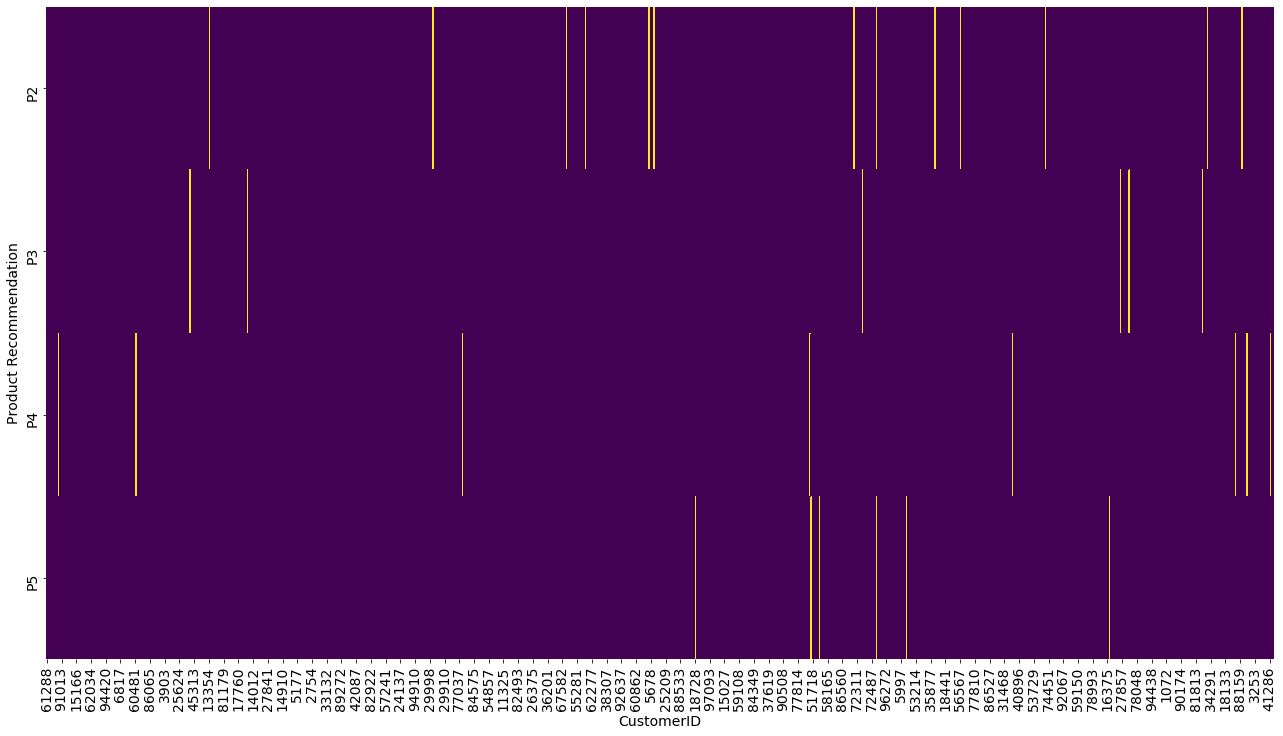

In [265]:
sns.heatmap((euclidean_rec == cosine_rec).iloc[:, 1:].T, cbar=False, cmap='viridis')
plt.xlabel('CustomerID')
plt.ylabel('Product Recommendation');

In [269]:
total_matches = (euclidean_rec == cosine_rec).iloc[:, 1:].sum().sum()
print(f'The total number of matches for all users and all products is {total_matches}.')

The total number of matches for all users and all products is 33.
